In [7]:
# Testing 
import numpy as np 
import matplotlib.pyplot as plt
import sys,os,time, json

Slice  1


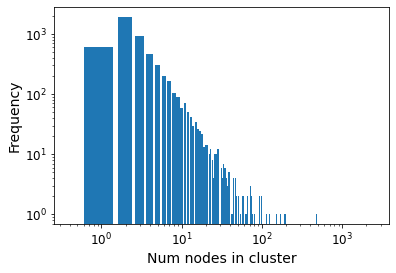

Slice  2


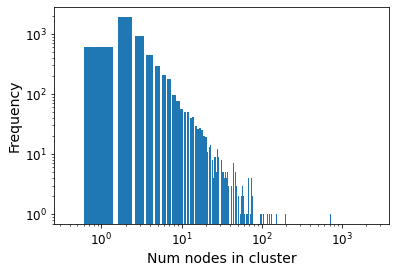

Slice  3


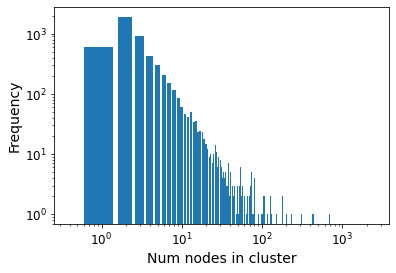

Slice  4


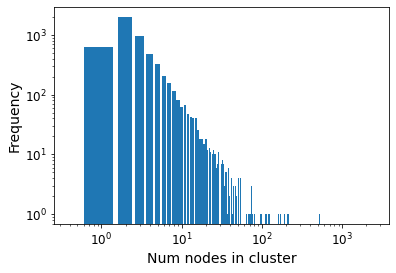

Slice  5


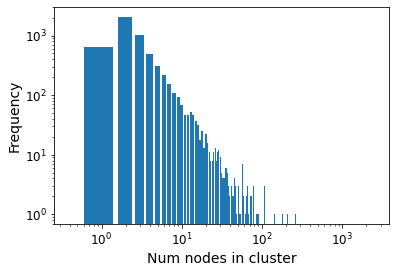

Slice  6


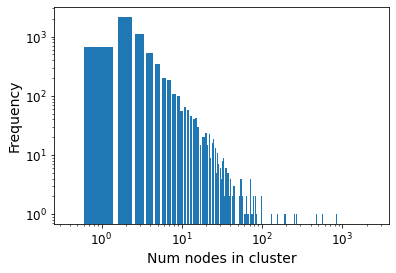

Slice  7


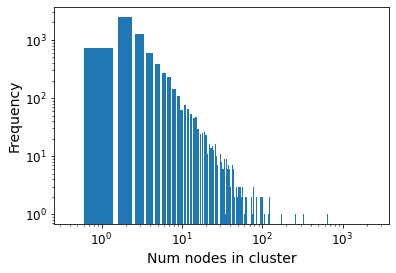

Slice  8


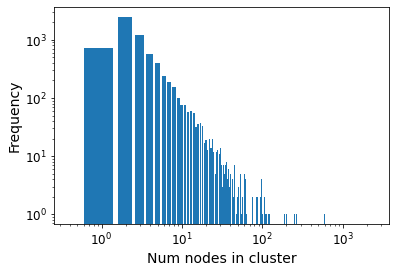

Slice  9


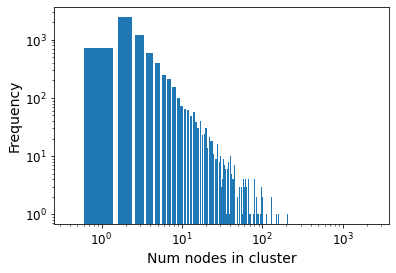

Slice  10


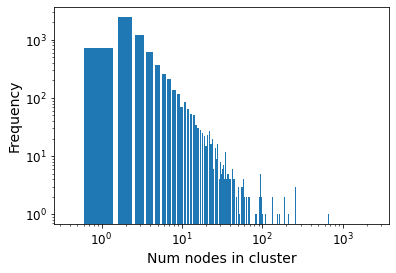

Slice  11


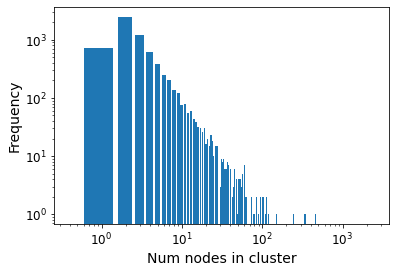

Slice  12


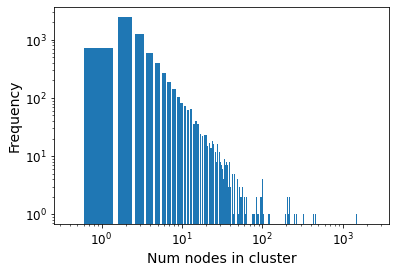

Slice  13


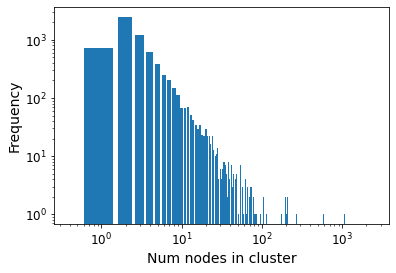

Slice  14


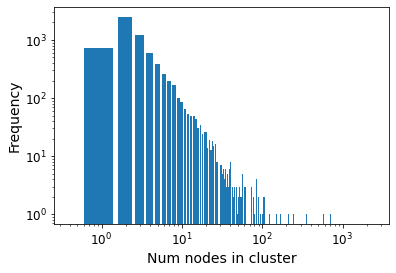

Slice  15


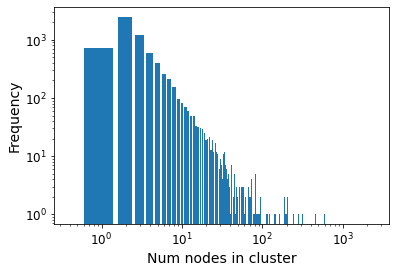

Slice  16


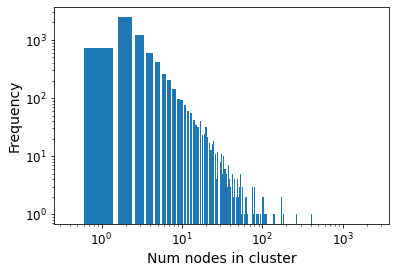

Slice  17


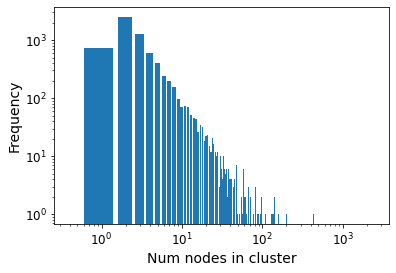

Slice  18


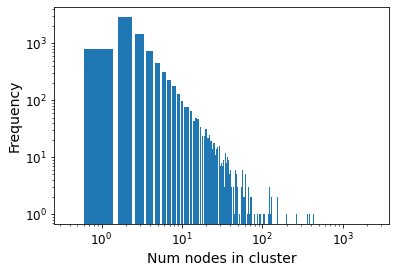

Slice  19


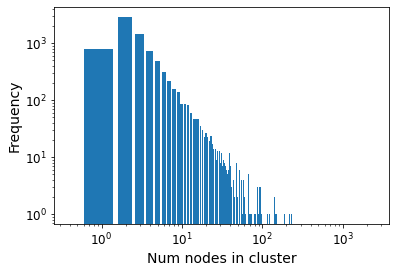

Slice  20


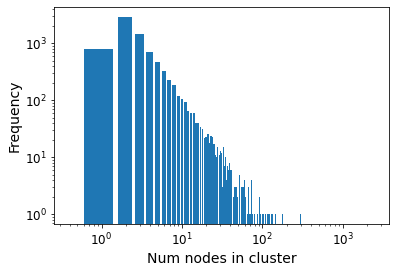

Slice  21


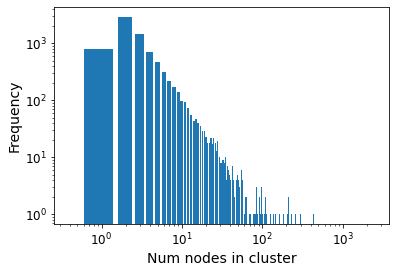

Slice  22


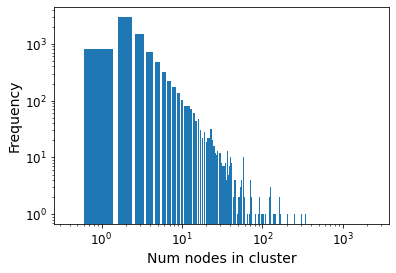

Slice  23


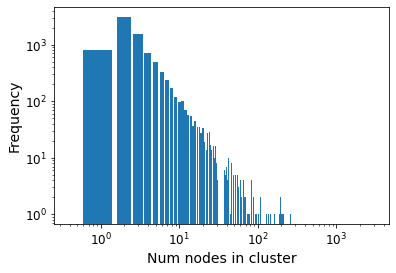

Slice  24


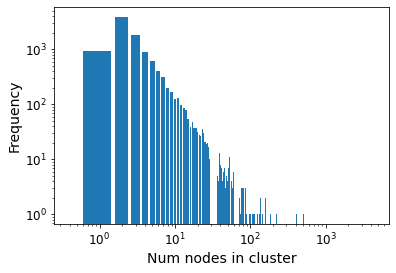

Slice  25


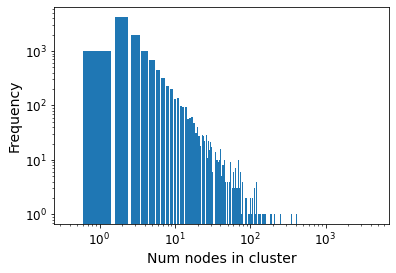

Slice  26


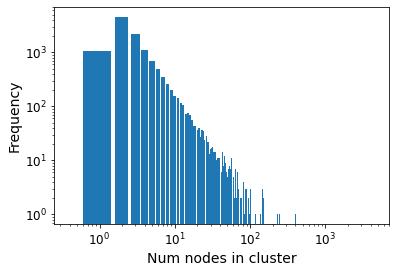

Slice  27


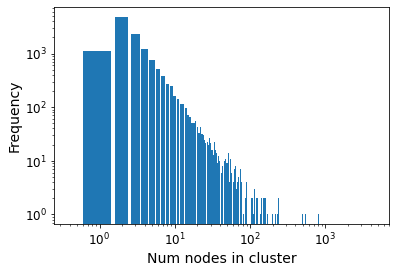

Slice  28


KeyboardInterrupt: 

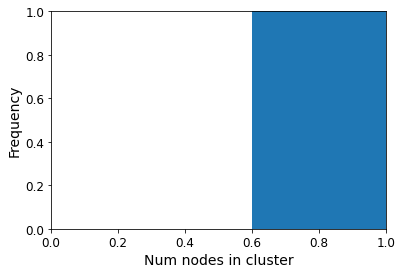

In [8]:

"""
path = "../../experiment12/experiment_12/k_600/parsed_dictionaries/Clusters/"

slices = {}
for i in range(1, 85):
    with open(path + "c_" + str(i) + ".json", "r") as inf:
        si = json.load(inf)

    max_n = 0
    for c in si.keys():
        ci = len(si[c]["uid"])
        if ci > max_n:
            max_n = ci 
    
    slices[str(i)] = [0] * (max_n + 1)

    for c in si.keys():
        n = len(si[c]["uid"])
        slices[str(i)][n] +=1


path_2_save = "./plots_from_notebook/"
with open(path_2_save + "k600_cluster_size_dist.json", "w") as fp:
    json.dump(slices, fp)

"""

path_2_save = "./plots_from_notebook/"
with open(path_2_save + "k600_cluster_size_dist.json", "r") as fp:
            all_data = json.load(fp)

for s in all_data.keys():
    print("Slice ", s)
    data = all_data[s]


    plt.xlabel("Num nodes in cluster", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.bar(range(len(data)), data)
    plt.yscale("log")
    plt.xscale("log")
    plt.show()
    
    ##plt.savefig(loglog_path + "LOG_cluster_size_distribution_slice" + s + ".pdf")
    #plt.clf()

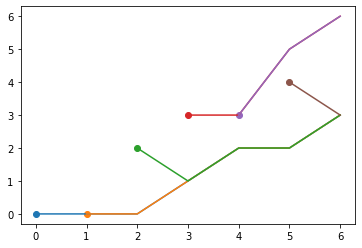

In [ ]:
ids = [[0,0,0,1,2,2,3],[0,0,1,2,2,3],[2,1,2,2,3],[3,3,5,6],[3,5,6],[4,3]]

st = 0
N = 7
for i in range(len(ids)):
    y = [i for i in range(st,N)]
    plt.scatter(y[0],ids[i][0])
    plt.plot(y,ids[i])
    st += 1
plt.show()



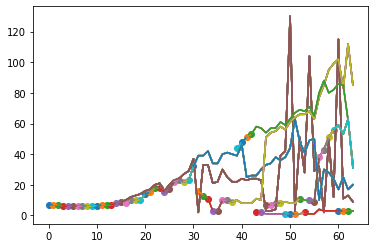

In [ ]:
def easy_plot(expnum, method):
    if expnum == 12:
        k = input("input k-value:\n")
        filename = "../../experiment12/experiment_12/k_"+str(k)+"/statistics/Cluster_tracker/"+method.title()+"/"
    else:
        filename = "../../experiment"+str(expnum)+"/statistics/Cluster_tracker/"+method.title()+"/"

    filename += "tracking_all_branches_largest_cluster_in_each_slice.txt"
    
    start_slice = []
    ids = []
    intersects = []
    num_slices = []
    with open(filename,"r") as infile:
        infile.readline()
        lines = infile.readlines()
        num_exp= len(lines)
        for line in lines:
            data = line.split(":")
            start_slice.append(int(data[0]))
            id = [int(i) for i in data[1].strip("[]").split(",")]
            ids.append(id)
            intersect = [float(i) for i in data[2].strip("[]").split(",")]
            intersects.append(intersect)
            num_slices.append(int(data[3]))


    start = 0
    #ids = ids
    N = num_slices[0]
    for i in range(num_exp):
        #slices = [i for i in range(start_slice[i]+1,num_slices[0]+1)]
        #iss = intersects[i][1:]
        slices = [i for i in range(start, N)]
        id = ids[i]
        plt.scatter(slices[0],id[0])
        plt.plot(slices,id)
        start += 1
    plt.show()



easy_plot(12,"java")
#easy_plot(6,"louvain")

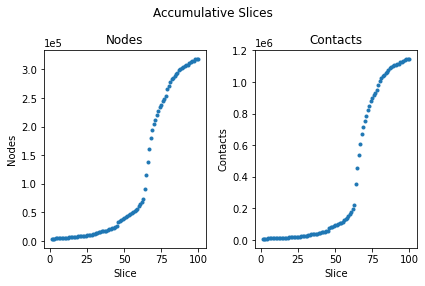

In [ ]:
#Plotting lenght of labels and graph files

#ks = [600,800]
path_to_res = "./plots_from_notebook/"

path_2_6 = "../../experiment6/experiment_6/"
num_slices = len(os.listdir(path_2_6)) + 1
label_lens = []
graph_lens = []
for i in range(1,num_slices):
    slice = path_2_6 + "/slice_" + str(i)
    labels = slice + "/labels_" + str(i) + ".csv"
    graphs = slice + "/graph_" + str(i) + ".mat"

    with open(labels,"r") as inf:
        label_lens.append(len(inf.readlines()))

    with open(graphs,"r") as inf:
        graph_lens.append(len(inf.readlines()))

label_lens = np.array(label_lens)
graph_lens = np.array(graph_lens)

np.save(path_to_res + "exp6_len_labels.npy",label_lens)
np.save(path_to_res + "exp6_len_graphs.npy",graph_lens)

"""

for k in ks:
    print("new k")

    label_lens = []
    graph_lens = []
    path = "../../experiment12/experiment_12/k_" + str(k) + "/k" + str(k)
    num_slices = len(os.listdir(path)) + 1
    for i in range(1,num_slices):
        slice = path + "/slice_" + str(i)
        labels = slice + "/labels_" + str(i) + ".csv"
        graphs = slice + "/graph_" + str(i) + ".mat"
        
        with open(labels,"r") as inf:
            label_lens.append(len(inf.readlines()))

        with open(graphs,"r") as inf:
            graph_lens.append(len(inf.readlines()))

    label_lens = np.array(label_lens)
    graph_lens = np.array(graph_lens)

    np.save(path_to_res + "k" + str(k) + "_len_labels.npy",label_lens)
    np.save(path_to_res + "k" + str(k) + "_len_graphs.npy",graph_lens)

for k in ks:
    labels_file = path_to_res + "k" + str(k) + "_len_labels.npy"
    graphs_file = path_to_res + "k" + str(k) + "_len_graphs.npy"

    labels = np.load(labels_file)
    graphs = np.load(graphs_file)

    numS = [i+1 for i in range(len(labels))]
    numS = np.array(numS)

    fig, axs = plt.subplots(1, 2)
    fig.suptitle("k " + str(k))
    axs[0].plot(numS, labels, ".")
    axs[0].set_title('Nodes')
    axs[0].set(xlabel = "Slice", ylabel = "Nodes")
    axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
    axs[1].plot(numS, graphs, ".")
    axs[1].set_title('Contacts')
    axs[1].set(xlabel = "Slice", ylabel = "Contacts")
    fig.tight_layout(pad=1.0)

    plt.savefig(path_to_res + "k" + str(k)+ "_num_contacts_and_nodes.pdf")
    plt.show()



labels_file = path_to_res +"exp7_len_labels.npy"
graphs_file = path_to_res +"exp7_len_graphs.npy"

labels = np.load(labels_file)
graphs = np.load(graphs_file)

numS = [i+1 for i in range(len(labels))]
numS = np.array(numS)

fig, axs = plt.subplots(1, 2)
fig.suptitle("Delta Slices")
axs[0].plot(numS, labels, ".")
axs[0].set_title('Nodes')
axs[0].set(xlabel = "Slice", ylabel = "Nodes")
axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
axs[1].plot(numS, graphs, ".")
axs[1].set_title('Contacts')
axs[1].set(xlabel = "Slice", ylabel = "Contacts")
fig.tight_layout(pad=1.0)

plt.savefig(path_to_res +"exp7_num_contacts_and_nodes.pdf")
plt.show()
"""
labels_file = path_to_res +"exp6_len_labels.npy"
graphs_file = path_to_res +"exp6_len_graphs.npy"

labels = np.load(labels_file)
graphs = np.load(graphs_file)

numS = [i+1 for i in range(len(labels))]
numS = np.array(numS)

fig, axs = plt.subplots(1, 2)
fig.suptitle("Accumulative Slices")
axs[0].plot(numS, labels, ".")
axs[0].set_title('Nodes')
axs[0].set(xlabel = "Slice", ylabel = "Nodes")
axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
axs[1].plot(numS, graphs, ".")
axs[1].set_title('Contacts')
axs[1].set(xlabel = "Slice", ylabel = "Contacts")
fig.tight_layout(pad=1.0)

plt.savefig(path_to_res +"exp6_num_contacts_and_nodes.pdf")
plt.show()













In [ ]:
"""
N = 10000
mat = np.ones([N,N])

maxN = 3
mat[50,500] = 5
mat[40,400] = 4
mat[30,300] = 3
idxs = []

mat_i = np.argsort(mat.ravel())[::-1]  #flatten and sorted after arguments

t_s = time.perf_counter()
result = [(int(k//mat.shape[1]), int(k%mat.shape[1])) for k in mat_i][:maxN] #unravel indexes, pick out 3 largest
t_e = time.perf_counter()
hjemmesnekk_t = t_e-t_s

t_s = time.perf_counter()
test = np.unravel_index(mat_i, mat.shape)
for i in range(3):
    idxs.append((test[0][i],test[1][i]))
t_e = time.perf_counter()
numpy_t = t_e-t_s

print(f"Hjemmesnekk resulterte i {idxs} på {hjemmesnekk_t:0.4f} s")
print(f"Np.unravel resulterte i {result} på {numpy_t:0.4f} s")
"""


'\nN = 10000\nmat = np.ones([N,N])\n\nmaxN = 3\nmat[50,500] = 5\nmat[40,400] = 4\nmat[30,300] = 3\nidxs = []\n\nmat_i = np.argsort(mat.ravel())[::-1]  #flatten and sorted after arguments\n\nt_s = time.perf_counter()\nresult = [(int(k//mat.shape[1]), int(k%mat.shape[1])) for k in mat_i][:maxN] #unravel indexes, pick out 3 largest\nt_e = time.perf_counter()\nhjemmesnekk_t = t_e-t_s\n\nt_s = time.perf_counter()\ntest = np.unravel_index(mat_i, mat.shape)\nfor i in range(3):\n    idxs.append((test[0][i],test[1][i]))\nt_e = time.perf_counter()\nnumpy_t = t_e-t_s\n\nprint(f"Hjemmesnekk resulterte i {idxs} på {hjemmesnekk_t:0.4f} s")\nprint(f"Np.unravel resulterte i {result} på {numpy_t:0.4f} s")\n'